- Import the "Retail_Sales_Data.csv" dataset.
- Explore the dataset to understand its structure and content.
- Identify the relevant variables for aggregating sales data, such as region, sales amount, and product category.
- Group the sales data by region and calculate the total sales amount for each region.
- Create bar plots or pie charts to visualize the sales distribution by region.
- Identify the top-performing regions based on the highest sales amount.
- Group the sales data by region and product category to calculate the total sales amount for each combination.
- Create stacked bar plots or grouped bar plots to compare the sales amounts across different regions and product categories.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('customer_shopping_data.csv')

In [3]:
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [13]:
df=df.drop(columns=['invoice_no','customer_id' , 'payment_method','invoice_date'])

In [14]:
df

,gender,age,category,quantity,price,shopping_mall
0,Female,28,Clothing,5,1500.40,Kanyon
1,Male,21,Shoes,3,1800.51,Forum Istanbul
2,Male,20,Clothing,1,300.08,Metrocity
3,Female,66,Shoes,5,3000.85,Metropol AVM
4,Female,53,Books,4,60.60,Kanyon
...,...,...,...,...,...,...
99452,Female,45,Souvenir,5,58.65,Kanyon
99453,Male,27,Food & Beverage,2,10.46,Forum Istanbul
99454,Male,63,Food & Beverage,2,10.46,Metrocity
99455,Male,56,Technology,4,4200.00,Istinye Park


In [6]:
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         99457 non-null  object 
 1   age            99457 non-null  int64  
 2   category       99457 non-null  object 
 3   quantity       99457 non-null  int64  
 4   price          99457 non-null  float64
 5   shopping_mall  99457 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 4.6+ MB


In [16]:
df.shape

(99457, 6)

In [17]:
df.dtypes

gender            object
age                int64
category          object
quantity           int64
price            float64
shopping_mall     object
dtype: object

In [19]:
df.groupby("shopping_mall").count()

,gender,age,category,quantity,price
shopping_mall,,,,,
Cevahir AVM,4991,4991,4991,4991,4991
Emaar Square Mall,4811,4811,4811,4811,4811
Forum Istanbul,4947,4947,4947,4947,4947
Istinye Park,9781,9781,9781,9781,9781
Kanyon,19823,19823,19823,19823,19823
Mall of Istanbul,19943,19943,19943,19943,19943
Metrocity,15011,15011,15011,15011,15011
Metropol AVM,10161,10161,10161,10161,10161
Viaport Outlet,4914,4914,4914,4914,4914


In [20]:
# To check the count of records grouped by the product categories

df.groupby("category").count()

,gender,age,quantity,price,shopping_mall
category,,,,,
Books,4981,4981,4981,4981,4981
Clothing,34487,34487,34487,34487,34487
Cosmetics,15097,15097,15097,15097,15097
Food & Beverage,14776,14776,14776,14776,14776
Shoes,10034,10034,10034,10034,10034
Souvenir,4999,4999,4999,4999,4999
Technology,4996,4996,4996,4996,4996
Toys,10087,10087,10087,10087,10087


In [21]:
branch_sales = df.groupby("shopping_mall").sum()

In [24]:
category_sales = df.groupby("category").sum()

In [27]:
new_branch_sales = branch_sales.sort_values(by = "price", ascending = False)

In [29]:
new_branch_sales.drop(columns=['gender' , 'category'], inplace=True)

In [30]:
new_branch_sales

,age,quantity,price
shopping_mall,,,
Mall of Istanbul,866333,60114,13851737.62
Kanyon,862280,59457,13710755.24
Metrocity,652968,44894,10249980.07
Metropol AVM,439086,30530,6937992.99
Istinye Park,424335,29465,6717077.54
Zorlu Center,220926,15234,3509649.02
Cevahir AVM,215474,14949,3433671.84
Viaport Outlet,212771,14716,3414019.46
Emaar Square Mall,209575,14501,3390408.31


In [32]:
new_category_sales=category_sales.sort_values(by = "price", ascending = False)

In [33]:
new_category_sales

,gender,age,quantity,price,shopping_mall
category,,,,,
Clothing,FemaleMaleFemaleFemaleMaleFemaleMaleFemaleFema...,1497054,103558,31075684.64,KanyonMetrocityForum IstanbulMall of IstanbulM...
Shoes,MaleFemaleMaleMaleFemaleFemaleFemaleFemaleFema...,436027,30217,18135336.89,Forum IstanbulMetropol AVMViaport OutletEmaar ...
Technology,MaleFemaleFemaleFemaleMaleFemaleFemaleFemaleFe...,216669,15021,15772050.00,KanyonMetrocityMall of IstanbulKanyonViaport O...
Cosmetics,FemaleFemaleMaleMaleFemaleFemaleMaleFemaleFema...,657937,45465,1848606.90,Istinye ParkMall of IstanbulIstinye ParkMetrop...
Toys,FemaleMaleMaleFemaleMaleMaleMaleMaleFemaleFema...,437032,30321,1086704.64,MetrocityCevahir AVMIstinye ParkMall of Istanb...
Food & Beverage,FemaleFemaleFemaleMaleFemaleFemaleFemaleFemale...,640605,44277,231568.71,MetrocityZorlu CenterCevahir AVMEmaar Square M...
Books,FemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFe...,216882,14982,226977.30,KanyonEmaar Square MallMetrocityMetrocityZorlu...
Souvenir,FemaleMaleMaleFemaleFemaleMaleFemaleFemaleFema...,216922,14871,174436.83,Istinye ParkCevahir AVMKanyonKanyonIstinye Par...


In [34]:
 new_category_sales.drop(columns=['gender' , 'shopping_mall'], inplace=True)

In [35]:
new_category_sales

,age,quantity,price
category,,,
Clothing,1497054,103558,31075684.64
Shoes,436027,30217,18135336.89
Technology,216669,15021,15772050.00
Cosmetics,657937,45465,1848606.90
Toys,437032,30321,1086704.64
Food & Beverage,640605,44277,231568.71
Books,216882,14982,226977.30
Souvenir,216922,14871,174436.83


In [36]:
# to get total sales for each combination of branch and product_category
combined_branch_category_sales = df.groupby(["shopping_mall", "category"]).sum()

In [42]:
# combined_branch_category_sales

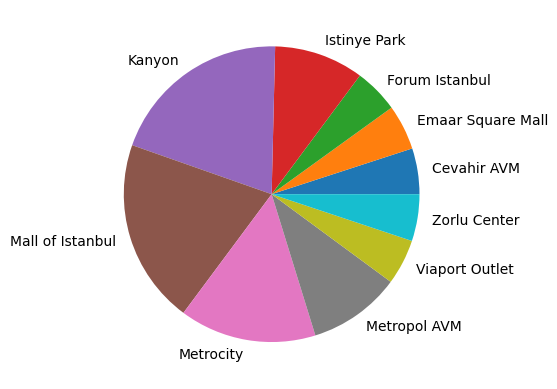

In [38]:
# pie chart for sales by branch

plt.pie(branch_sales["price"], labels = branch_sales.index)
plt.show() 

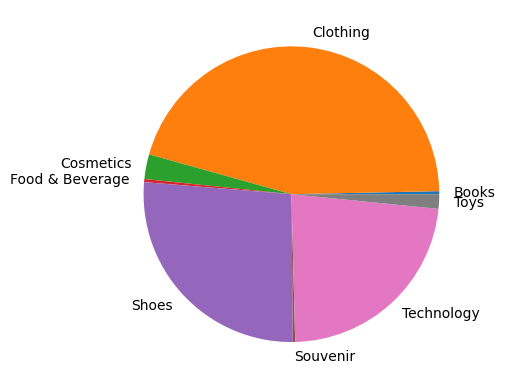

In [39]:
# pie chart for sales by product category

plt.pie(category_sales["price"], labels = category_sales.index)
plt.show()

In [40]:
combined_pivot = df.pivot_table(index="shopping_mall", columns="category", values="price", aggfunc="sum")

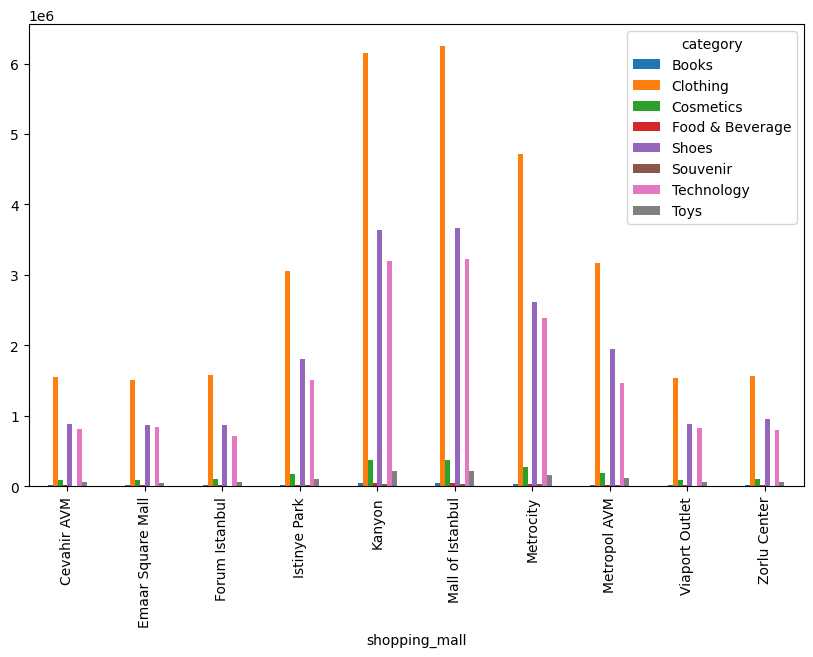

In [41]:
# grouped bar chart for sales of different categories at different branches

combined_pivot.plot(kind="bar", figsize=(10, 6))
plt.show()